In [1]:
import pandas as pd

In [2]:
from pandas_datareader import data as pdr

#import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.rcParams.update({'figure.max_open_warning': 0})

[*********************100%***********************]  1 of 1 completed


TypeError: Timestamp subtraction must have the same timezones or no timezones

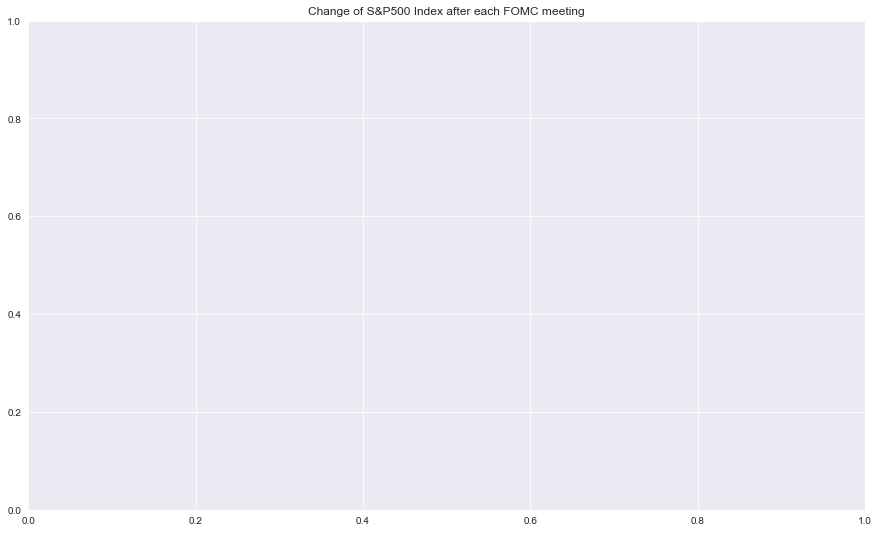

In [3]:
## List of FOMC dates

start_date = [
    "2022-09-21", "2022-07-27", "2022-06-15", "2022-05-04", "2022-03-16", 
    "2018-12-19", "2018-09-26", "2018-06-13", "2018-03-21",
    "2017-12-13", "2017-06-14", "2017-03-15", "2016-12-14", "2015-12-16", "2006-06-29", "2006-05-10",
    "2006-03-28", "2006-01-31", "2005-12-13","2005-11-01", "2005-09-01","2005-09-20","2005-08-09","2005-06-30",
    "2005-05-03", "2005-03-22", "2005-02-02","2004-12-14","2004-11-10","2004-09-21","2004-08-10","2004-06-30",
    "2000-05-16","2000-03-21", "2000-02-02"
    ]
end_date = []

for i in range(len(start_date)): ## Generate End dates for each FOMC meeting term
    start_date[i] = datetime.strptime(start_date[i], "%Y-%m-%d") - timedelta(days = 1)
    end_date.append(start_date[i] + timedelta(days = 55))
    start_date[i] = datetime.strftime(start_date[i], "%Y-%m-%d") 
    end_date[i] = datetime.strftime(end_date[i], "%Y-%m-%d") # end_date and start_date as strings

def collectData(ticker): ## Plot 30 days movement of ticker after FOMC dates. Last plot combines every dates.
    plt.figure(len(start_date), figsize = (15, 9))
    plt.title("Change of S&P500 Index after each FOMC meeting")
    for i in range(len(start_date)):
        data = pdr.get_data_yahoo(ticker, start=start_date[i], end=end_date[i])
        #print(data)
        x = data.index
        shift = datetime.strptime(start_date[i], "%Y-%m-%d")
        shift = shift.replace(tzinfo = timezone.utc)
        yPercent = 100 *(data['Close'] - data['Open'])  / data['Open']
        y = data['Close']
        x = (x - shift).days
        plt.figure(i, figsize = (15, 4))
        plt.plot(x, y)
        plt.title("S&P500 After FOMC Meeting on {}".format(start_date[i]))
        plt.figure(len(start_date))
        plt.plot(x, yPercent)
    

collectData('^GSPC') ## Ticker for S&P500



    

In [4]:
import csv

tickerList = []

with open('TickerList.csv') as f:
    reader = csv.reader(f)
    tickerList = list(reader)

print(tickerList)
print(len(tickerList[0]))
tickerList[0][43]='BRKB'
print(tickerList)


[['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'AAP', 'AES', 'AFL', 'A', 'APD', 'ALK', 'ALB', 'ARE', 'ALLE', 'ALL', 'MO', 'AMCR', 'AEE', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'APH', 'AON', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'AZO', 'AVB', 'AVY', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'BLK', 'BK', 'BA', 'BWA', 'BXP', 'BSX', 'BMY', 'BR', 'BRO', 'BF.B', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBRE', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'C', 'CFG', 'CLX', 'CMS', 'KO', 'CL', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'CTVA', 'CTRA', 'CCI', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'DVN', 'DLR', 'DFS', 'DIS', 'DG', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD', 'DXC', 'EMN', 'ETN', 'ECL', 'EIX', 'EW', 'ELV', 'LLY', 'EMR', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQR', 'ESS', 'EL', 'RE', 'EVRG', 'ES', 'EXR', 'XOM', 'FDS', 'FRT', 'FDX', 'FRC', 'FE', 'FIS', 'FLT', 'FMC'

In [9]:
#list_df=[]
for i in range(len(tickerList[0])):
    #list = []
    price = yf.Ticker(tickerList[0][i])
    stock=pd.DataFrame()
    for m in range(len(start_date)):
        price_mvt = price.history(start=start_date[m], end = end_date[m], interval = '1d')
        price_mvt=price_mvt['Close']
        price_mvt=price_mvt.reset_index()
        price_mvt=price_mvt.drop(columns='Date')
        price_mvt=price_mvt.transpose()
        price_mvt=price_mvt.rename({'Close':start_date[m]}) 
        price_mvt=price_mvt.iloc[0: , 0:31]
        stock = stock.append(price_mvt)
    stock.to_csv(tickerList[0][i]+'.csv')
    #list.append(tickerList[0][i]+'.csv')

    
    

- AOS: No data found for this date range, symbol may be delisted
- ABBV: Data doesn't exist for startDate = 1151467200, endDate = 1156219200
- ABBV: Data doesn't exist for startDate = 1147147200, endDate = 1151899200
- ABBV: Data doesn't exist for startDate = 1143435600, endDate = 1148184000
- ABBV: Data doesn't exist for startDate = 1138597200, endDate = 1143349200
- ABBV: Data doesn't exist for startDate = 1134363600, endDate = 1139115600
- ABBV: Data doesn't exist for startDate = 1130734800, endDate = 1135486800
- ABBV: Data doesn't exist for startDate = 1125460800, endDate = 1130212800
- ABBV: Data doesn't exist for startDate = 1127102400, endDate = 1131858000
- ABBV: Data doesn't exist for startDate = 1123473600, endDate = 1128225600
- ABBV: Data doesn't exist for startDate = 1120017600, endDate = 1124769600
- ABBV: Data doesn't exist for startDate = 1115006400, endDate = 1119758400
- ABBV: Data doesn't exist for startDate = 1111381200, endDate = 1116129600
- ABBV: Data doesn't ex

KeyboardInterrupt: 

In [11]:
# previous cell에서 중간에 run 멈춰서 하는 데 너무 오래걸려서 tickerList 분리후, 멈춘 곳에서 다시 loop 시작
tickerList2 = tickerList[0][168:]
for i in range(len(tickerList2)):
  
    price = yf.Ticker(tickerList2[i])
    stock=pd.DataFrame()
    for m in range(len(start_date)):
        price_mvt = price.history(start=start_date[m], end = end_date[m], interval = '1d')
        price_mvt=price_mvt['Close']
        price_mvt=price_mvt.reset_index()
        price_mvt=price_mvt.drop(columns='Date')
        price_mvt=price_mvt.transpose()
        price_mvt=price_mvt.rename({'Close':start_date[m]}) 
        price_mvt=price_mvt.iloc[0: , 0:31]
        stock = stock.append(price_mvt)
    stock.to_csv(tickerList2[i]+'.csv')
    #list.append(tickerList2[i]+'.csv')


- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for this date range, symbol may be delisted
- HWM: No data found for 

In [6]:
tickerList[0].index('HD')

168

In [17]:
#csv 파일 read 할 수 있도록
csv_list = []
for i in range(len(tickerList[0])):
    csv_list.append(tickerList[0][i]+'.csv')

In [18]:
csv_list


['MMM.csv',
 'AOS.csv',
 'ABT.csv',
 'ABBV.csv',
 'ACN.csv',
 'ADM.csv',
 'AAP.csv',
 'AES.csv',
 'AFL.csv',
 'A.csv',
 'APD.csv',
 'ALK.csv',
 'ALB.csv',
 'ARE.csv',
 'ALLE.csv',
 'ALL.csv',
 'MO.csv',
 'AMCR.csv',
 'AEE.csv',
 'AXP.csv',
 'AIG.csv',
 'AMT.csv',
 'AWK.csv',
 'AMP.csv',
 'ABC.csv',
 'AME.csv',
 'APH.csv',
 'AON.csv',
 'APTV.csv',
 'ANET.csv',
 'AJG.csv',
 'AIZ.csv',
 'T.csv',
 'ATO.csv',
 'AZO.csv',
 'AVB.csv',
 'AVY.csv',
 'BALL.csv',
 'BAC.csv',
 'BBWI.csv',
 'BAX.csv',
 'BDX.csv',
 'WRB.csv',
 'BRKB.csv',
 'BBY.csv',
 'BIO.csv',
 'BLK.csv',
 'BK.csv',
 'BA.csv',
 'BWA.csv',
 'BXP.csv',
 'BSX.csv',
 'BMY.csv',
 'BR.csv',
 'BRO.csv',
 'BF.B.csv',
 'CPT.csv',
 'CPB.csv',
 'COF.csv',
 'CAH.csv',
 'KMX.csv',
 'CCL.csv',
 'CARR.csv',
 'CTLT.csv',
 'CAT.csv',
 'CBRE.csv',
 'CE.csv',
 'CNC.csv',
 'CNP.csv',
 'CDAY.csv',
 'CF.csv',
 'CRL.csv',
 'SCHW.csv',
 'CVX.csv',
 'CMG.csv',
 'CB.csv',
 'CHD.csv',
 'CI.csv',
 'C.csv',
 'CFG.csv',
 'CLX.csv',
 'CMS.csv',
 'KO.csv',
 'CL.

['ZTS.csv']